<a href="https://colab.research.google.com/github/sivaparvathi1234/siva-parvathi_INFO5502_Spring2022/blob/main/latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The ninth Lab-assignment (04/14/2022, 50 points in total)

The purpose of this assignment is to practice different Hypothesis Testing.

### Question 1 (15 points) 

During the 1980s, the general consensus is that about 5% of the nation’s children had autism. Some claimed that increases certain chemicals in the environment has led to an increase in autism. 

(1) Write an appropriate hypothesis test for this situation (5 points).  

(2) Give an appropriate test for this hypothesis, stating what are the necessary conditions for performing the test (5 points). 

(3) A recent study examined 384 children and found that 46 showed signs of autism. Perform a test of the hypothesis and state the p-value (5 points). 

In [1]:
import scipy.stats
import math

In [2]:

n=384
p=46/384
alpha=0.05
print("No of children i.e. population",n)
print("observed proportion",p)
print("probability significance level",alpha)

No of children i.e. population 384
observed proportion 0.11979166666666667
probability significance level 0.05


In [3]:

z=(p-alpha)/math.sqrt((alpha*(1-alpha))/n)
print('z-score:',z)

z-score: 6.27512493759735


In [4]:

p_value =1 - int((scipy.stats.t.cdf(z, df=n-1))*1000)/1000
print('P-value:',int((p_value)*1000)/1000)

P-value: 0.001


### Question 2 (15 points) 

National data in the 1960s showed that about 44% of the adult population had never smoked. 

(1) State a null and alternative hypothesis to test that the fraction of the 1995 population of adults that had never smoked had increased (5 points).  

(2) A national random sample of 891 adults were interviewed and 463 stated that they had never smoked. Perform a z-test of the hypothesis and give an approriate p-value (5 points). 

(3) Create a 98% confidence interval for the proportion of adults who had never been smokers (5 points). 

In [5]:

n=891
p=463/891
alpha=0.44
print("No of children i.e. population",n)
print("observed proportion",p)
print("probability significance level",alpha)

No of children i.e. population 891
observed proportion 0.5196408529741863
probability significance level 0.44


In [6]:

z=(p-alpha)/math.sqrt((alpha*(1-alpha))/n)
print('z-score:',z)

z-score: 4.7891054863903095


In [7]:

p_value =1 - int((scipy.stats.t.cdf(z, df=n-1))*1000)/1000
print('P-value:',int((p_value)*1000)/1000)

P-value: 0.001


In [8]:

ci=round(p-z/2*(math.sqrt(p*(1-p)/n)),3),round(p+z/2*(math.sqrt(p*(1-p)/n)),3)
print('98% confidence interval who had never been smokers is:',ci)

98% confidence interval who had never been smokers is: (0.48, 0.56)


### Question 3 (15 points) 
In this problem,we will examine the sugar content of several national brands of cereals, here measured as a percentage of weight.

![assignmen_9.png](attachment:assignmen_9.png)

(1) Give a summary of these two datasets (5 points). 

(2) Create side-by-side boxplots and interpret what you see (5 points). 

(3) Use python to create a 95% confidence interval for the difference in mean sugar content and explain your result (5 points). 

In [9]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms


In [10]:
children={'children':[40.3,55.0,45.7,43.3,50.3,45.9,53.5,43.0,44.2,44.0,33.6,55.1,48.8,50.4,37.8,60.3,46.6,47.4,44.0]}
childrenDataset=pd.DataFrame(children)
print(childrenDataset.head(5).to_string(index=False))

 children
     40.3
     55.0
     45.7
     43.3
     50.3


In [11]:
adult={'adult':[20.0,30.2,2.2,7.5,4.4,22.2,16.6,14.5,21.4,3.3,10.0,1.0,4.4,1.3,8.1,6.6,7.8,10.6,10.6,16.2,14.5,4.1,15.8,4.1,2.4,3.5,8.5,4.7,18.4]}
adultDataset=pd.DataFrame(adult)
print(adultDataset.head(5).to_string(index=False))

 adult
  20.0
  30.2
   2.2
   7.5
   4.4


In [ ]:
print('Summary Statistics of the Children Dataset')
print(childrenDataset.describe())

Summary Statistics of the Children Dataset
        children
count  19.000000
mean   46.800000
std     6.418376
min    33.600000
25%    43.650000
50%    45.900000
75%    50.350000
max    60.300000


In [12]:
print('Summary Statistics of the Adult Dataset')
print(adultDataset.describe())

Summary Statistics of the Adult Dataset
           adult
count  29.000000
mean   10.168966
std     7.475680
min     1.000000
25%     4.100000
50%     8.100000
75%    15.800000
max    30.200000


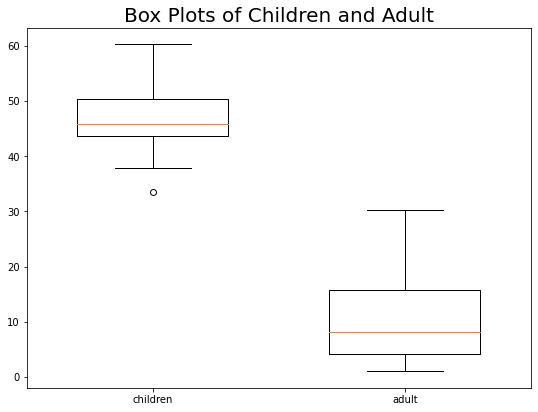

In [13]:
fig=plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1]) 
ax.boxplot([childrenDataset['children'],adultDataset['adult']],widths=0.6)
plt.title("Box Plots of Children and Adult",fontsize=20)
ax.set_xticklabels(['children','adult'])
plt.show()

### Question 4 (15 points, with 10 extra point included) A/B Testing

Punishment for crime has many [philosophical justifications](http://plato.stanford.edu/entries/punishment/#ThePun).  An important one is that fear of punishment may *deter* people from committing crimes.

In the United States, some jurisdictions execute people who are convicted of particularly serious crimes, such as murder.  This punishment is called the *death penalty* or *capital punishment*.  The death penalty is controversial, and deterrence has been one focal point of the debate.  There are other reasons to support or oppose the death penalty, but in this project we'll focus on deterrence.

The key question about deterrence is:

> Through our exploration, does instituting a death penalty for murder actually reduce the number of murders?

You might have a strong intuition in one direction, but the evidence turns out to be surprisingly complex.  Different sides have variously argued that the death penalty has no deterrent effect and that each execution prevents 8 murders, all using statistical arguments!  We'll try to come to our own conclusion.

#### The data

The main data source for this lab comes from a [paper](http://cjlf.org/deathpenalty/DezRubShepDeterFinal.pdf) by three researchers, Dezhbakhsh, Rubin, and Shepherd.  The dataset contains rates of various violent crimes for every year 1960-2003 (44 years) in every US state.  The researchers compiled the data from the FBI's Uniform Crime Reports.

Since crimes are committed by people, not states, we need to account for the number of people in each state when we're looking at state-level data.  Murder rates are calculated as follows:

$$\text{murder rate for state X in year Y} = \frac{\text{number of murders in state X in year Y}}{\text{population in state X in year Y}}*100000$$

(Murder is rare, so we multiply by 100,000 just to avoid dealing with tiny numbers.)

Murder rates vary over time, and different states exhibit different trends. The rates in some states change dramatically from year to year, while others are quite stable. Let's plot a couple, just to see the variety.

*Hint*: To create two lines, you will need create the table `ak_mn` with two columns of murder rates, in addition to a column of years. This table will have the following structure:

| Year | Murder rate in Alaska | Murder rate in Minnesota |
|------|-----------------------|--------------------------|
| 1960 | 10.2                  | 1.2                      |
| 1961 | 11.5                  | 1                        |
| 1962 | 4.5                   | 0.9                      |

<center>... (41 rows omitted)</center>

Some US states have the death penalty, and others don't, and laws have changed over time. In addition to changes in murder rates, we will also consider whether the death penalty was in force in each state and each year.

Using this information, we would like to investigate how the presence of the death penalty affects the murder rate of a state.

(1) Use preban_rates_copy and postban_rates to create a table change_in_death_rates that contains each state's population, murder rate, and whether or not that state had the death penalty for both 1971 and 1973. (5 points)

Create a table rate_means that contains the average murder rates for the states that had the death penalty and the states that didn't have the death penalty. It should have two columns: one indicating if the penalty was in place, and one that contains the average murder rate for each group.

Hint: tbl_1.append(tbl_2) with create a new table that includes rows from both tbl_1 and tbl_2. Both tables must have the exactly the same columns, in the same order.

(2) We want to figure out if there is a difference between the distribution of death rates in 1971 and 1973. Specifically, we want to test if murder rates were higher in 1973 than they were in 1971. You are required to conduct A/B Testing below (10 points):

(2-1) Set observed_difference to the observed test statistic using the rate_means table. 


(2-2) Given a table like change_in_death_rates, a value column label, and a group column group_label, write a function that calculates the appropriate test statistic.

(2-3) Write a function simulate_and_test_statistic to compute one trial of our A/B test. Your function should run a simulation and return a test statistic.

(2-4) Simulate 5000 trials of our A/B test and store the test statistics in an array called differences.

(2-5) Find the p-value for your test and assign it to empirical_P.

(2-6) Using a 5% P-value cutoff, draw a conclusion about the null and alternative hypotheses. Describe your findings using simple, non-technical language. What does your analysis tell you about murder rates after the death penalty was suspended? What can you claim about causation from your statistical analysis?


In [14]:

import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')
from statistics import mean
from datascience import Table,make_array
from datascience.predicates import are
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/AmithReddyKasarla/AmithReddy_INFO5502_Spring2022/main/crime_rates.csv',sep=',')
print(df.head(5).to_string(index=False))

 State  Year  Population  Violent Crime Rate  Murder Rate  Forcible Rape Rate  Robbery Rate  Aggraveted Assault Rate  Property Crime Rate  Burglary Rate  Larceny & Theft Rate  Motor Vehicle Theft Rate
Alaska  1960      226167          104.300003         10.2           20.799999     28.299999                45.099998          1544.900024     332.100006            970.500000                242.300003
Alaska  1961      234000           88.900002         11.5           13.200000     12.400000                51.700001          1540.599976     380.799988            950.000000                209.800003
Alaska  1962      246000           91.500000          4.5           18.700001     13.800000                54.500000          1564.599976     351.600006            985.400024                227.600006
Alaska  1963      248000          109.699997          6.5           14.900000     22.200001                66.099998          1952.800049     381.500000           1213.699951                357.70

In [ ]:
murders=Table.from_df(df[['State','Year','Population','Murder Rate']])
murders.show(5)

State,Year,Population,Murder Rate
Alaska,1960,226167,10.2
Alaska,1961,234000,11.5
Alaska,1962,246000,4.5
Alaska,1963,248000,6.5
Alaska,1964,250000,10.4


In [ ]:
ak_mn = Table().with_columns("Year", list(df['Year'].unique()),
                             "Murder rate in Alaska",df['Murder Rate'].loc[df['State']=='Alaska'],
                             "Murder rate in Minnesota",df['Murder Rate'].loc[df['State']=='Minnesota'])
ak_mn.show(5)

Year,Murder rate in Alaska,Murder rate in Minnesota
1960,10.2,1.2
1961,11.5,1
1962,4.5,0.9
1963,6.5,1.2
1964,10.4,1.4


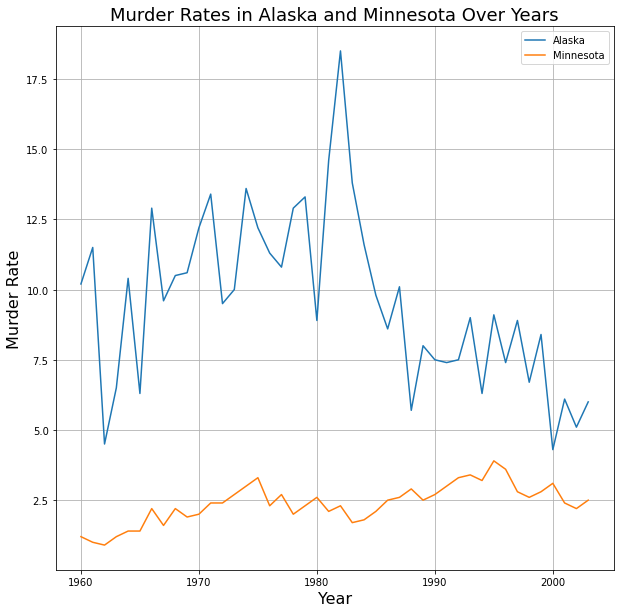

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Murder Rates in Alaska and Minnesota Over Years',fontsize=18)
plt.plot(ak_mn['Year'],ak_mn['Murder rate in Alaska'],label='Alaska')
plt.plot(ak_mn['Year'],ak_mn['Murder rate in Minnesota'],label='Minnesota')
plt.xlabel('Year',fontsize=16)
plt.ylabel('Murder Rate',fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [ ]:
def hadDeathPenalty(state):
  if state in noDeathPenaltyrates:
    return False
  else:
    return True

In [ ]:
noDeathPenaltyrates = ['Alaska','Michigan','Minnesota','Hawaii']
states = murders.group('State').select('State')
deathPenalty = states.with_column('hadDeathPenalty', states.apply(hadDeathPenalty, 0))
deathPenalty

State,hadDeathPenalty
Alabama,True
Alaska,False
Arizona,True
Arkansas,True
California,True
Colorado,True
Connecticut,True
Delaware,True
Florida,True
Georgia,True
